In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비

- sklearn에서 제공하는 샘플 데이터 활용


In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
# print('data:', iris.data)
# print('data:', iris.feature_names)
# print('data:', iris.target)
# print('data:', iris.target_names)

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["species"] = iris.target
df_iris.head(3)


# df_iris["species"] = df_iris["species"].map(dict(zip([0,1,2], iris.target_names)))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### 데이터 탐색


In [51]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [52]:
# -----------------------------------
# 종속변수 빈도수 확인
#   불균형 여부 확인
# -----------------------------------

df_iris["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

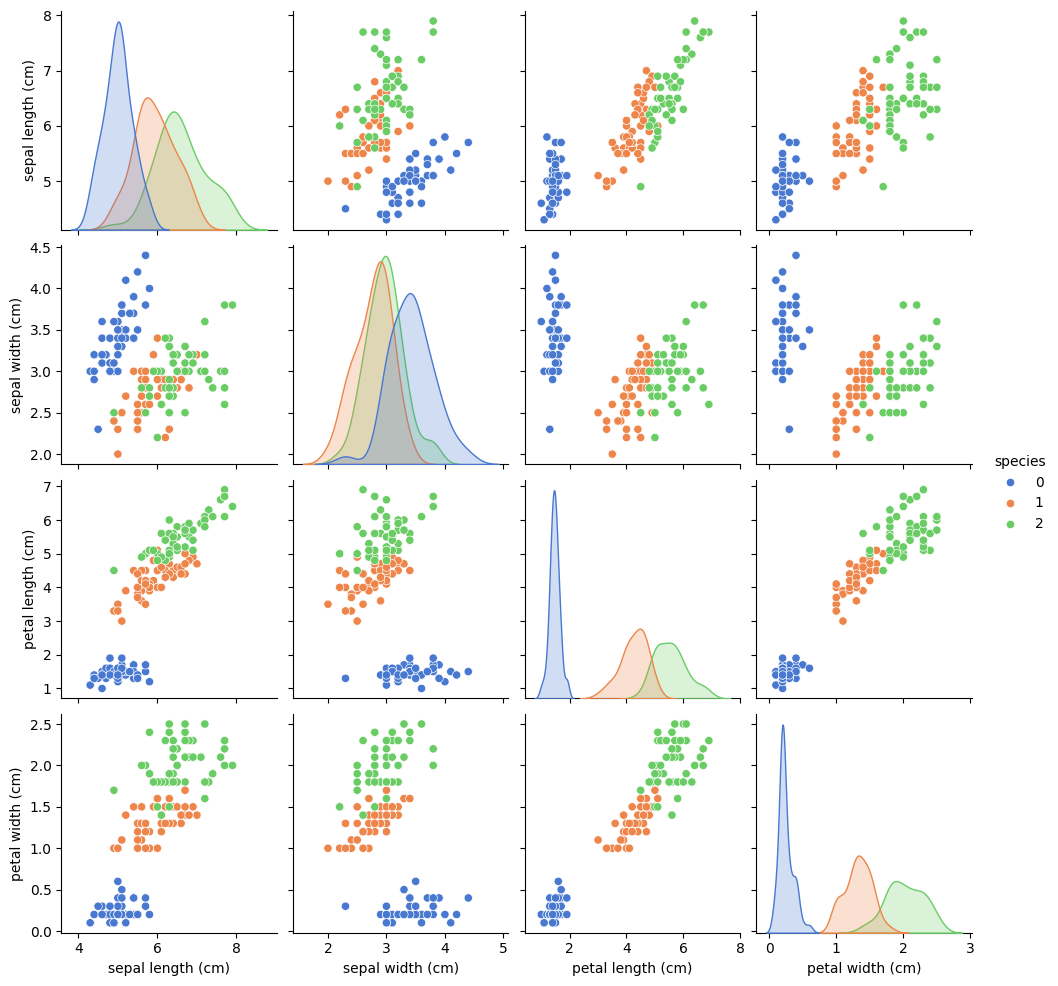

In [53]:
# -----------------------------------
# 시각화
# -----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df_iris, hue="species", palette="muted")
plt.show()

#### 데이터 선택


In [54]:
# ----------------
# X, y
# ----------------
X = df_iris.drop("species", axis=1)
y = df_iris["species"]

#### 학습용 데이터와 테스트용 데이터 분할


In [55]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [56]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

species
0    40
2    40
1    40
Name: count, dtype: int64
species
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성 및 학습


In [57]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

# ---------------------------------------
# 모델 학습
# ---------------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 모델 평가


In [58]:
# ---------------------------------------
# 테스트용 데이터로 예측
# ---------------------------------------
pred = model.predict(X_test)
print("예측label>>", pred)
print("실제label>>", y_test.values)

예측label>> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
실제label>> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [59]:
# ---------------------------------------
# 정확도 평가
# ---------------------------------------
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f"예측정확도 >> {accuracy:.2f}")

예측정확도 >> 0.93


In [60]:
# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg
#       클래스별 지표(precision‧recall‧f1-score)를 해당 클래스의 샘플 수(support)로 가중평균한 값
#       데이터 불균형이 있을 때 전체 모델 성능을 현실적으로 보여준다
#       weighted ave 값이 매우 높으면 다수 클래스가 모델 평가의 대부분을 차지한다는 의미
# ---------------------------------------
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### 의사결정트리 모델의 학습 결과


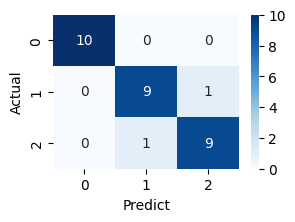

In [61]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred, labels=[0, 1, 2])

plt.figure(figsize=(3, 2))
sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")
pass

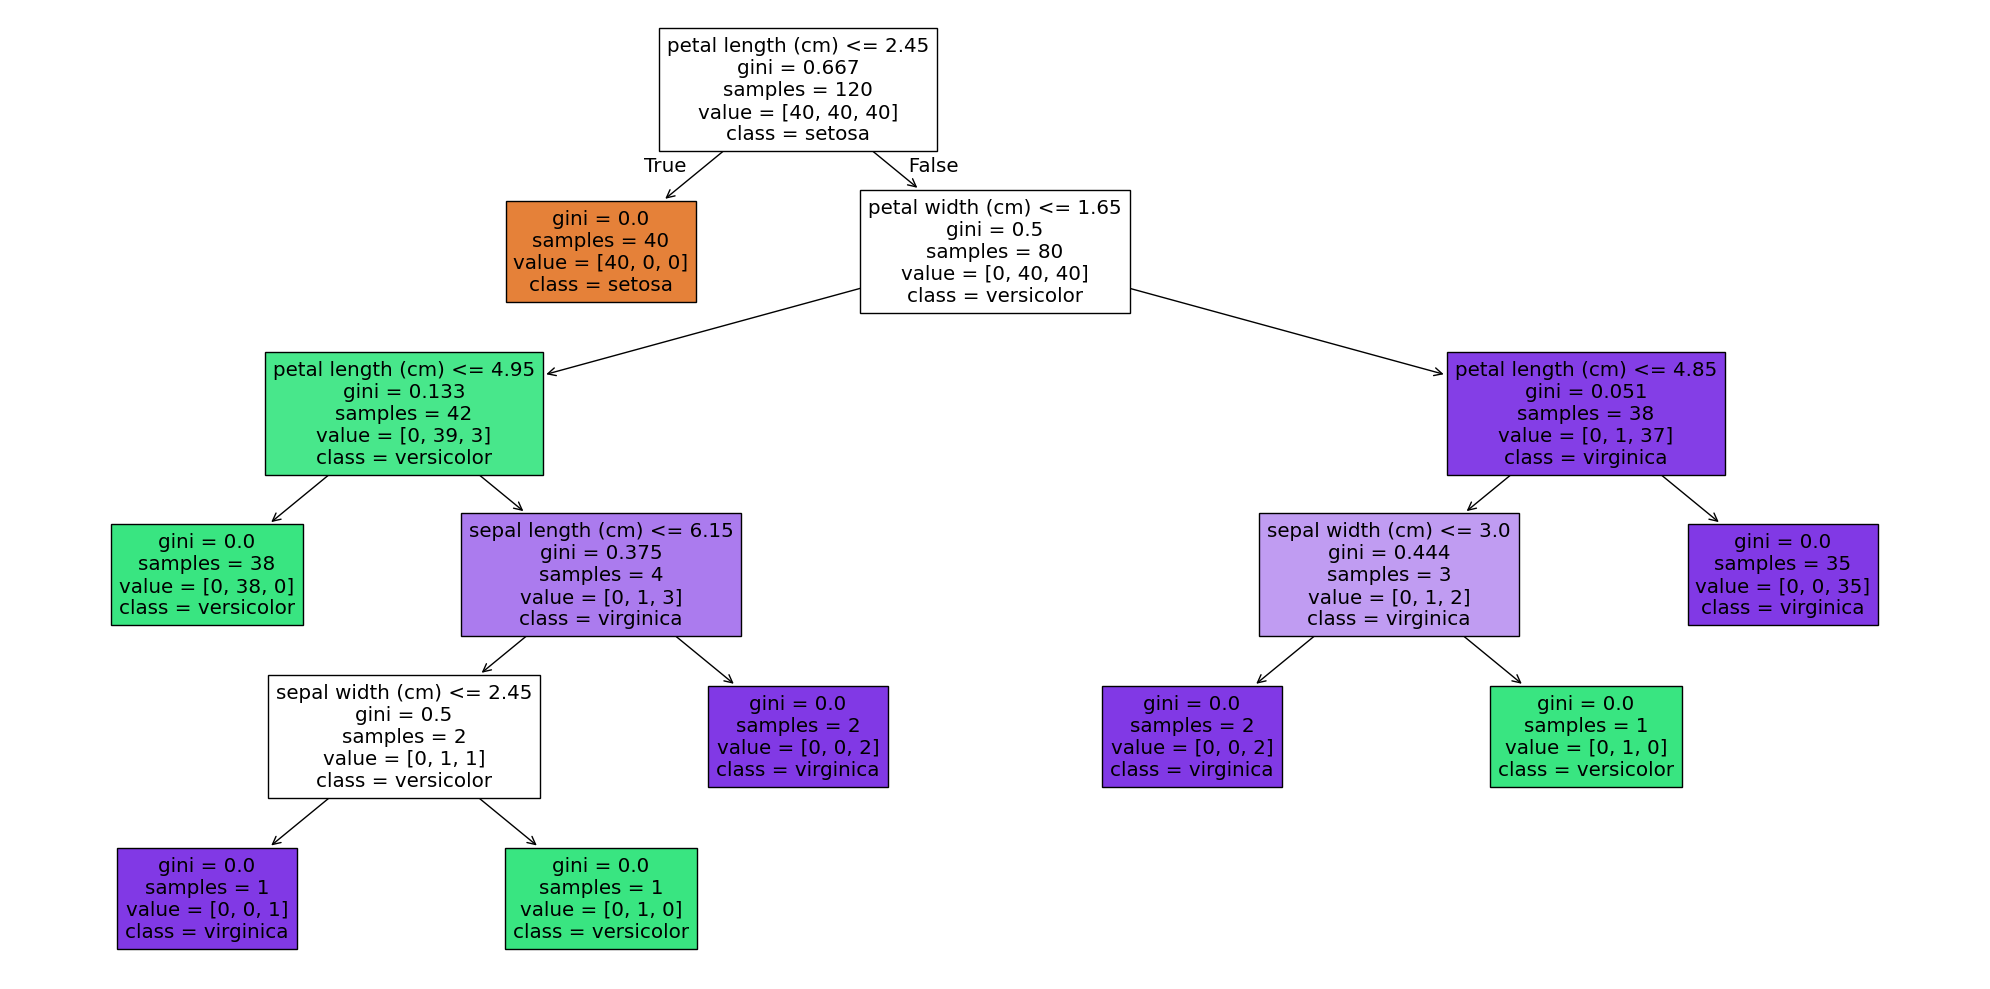

In [62]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True
)
plt.tight_layout()
plt.show()

In [63]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------
print(model.get_depth())

5


특성의 중요도 >>> [0.00625    0.02916667 0.5585683  0.40601504]


<Axes: >

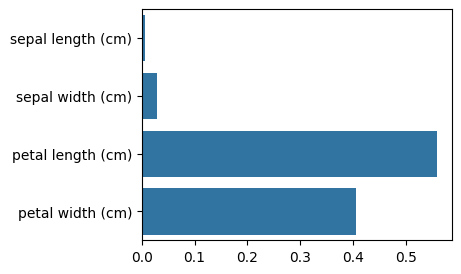

In [64]:
# --------------------------
# feature_importances_
# --------------------------
print(f"특성의 중요도 >>> {model.feature_importances_}")

plt.figure(figsize=(4, 3))
sns.barplot(y=iris.feature_names, x=model.feature_importances_)